# Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import mysql.connector as mysql

# Konek Database

In [2]:
db_connection = mysql.connect(host = "10.4.19.15", 
                            database = 'mpninfo', 
                            user = 'indra', 
                            password= 'indra', 
                            port = 3306)

# READ FILE

In [3]:
mfwp = pd.read_excel('D:\DATA KANTOR\MASTERFILE\AFTER SMO 24MEI2021\MFWP_ARKLU.xlsx',engine='openpyxl',dtype={'NPWP_FULL':'str'}) 
map = pd.read_excel('D:\DATA KANTOR\MASTERFILE\KODE_MAP_FILTERED.xlsx', engine='openpyxl', dtype={'KD MAP':'str'})


In [4]:
mfwp.dtypes

NPWP_FULL    object
NAMA_WP      object
KODE_KLU     object
NAMA_KLU     object
NAMA_AR      object
SEKSI        object
NAMA_JS      object
dtype: object

# Kueri

In [5]:
query = '''
SELECT CONCAT(npwp,kpp,cabang) as Npwp_Full, nama, kdmap, kdbayar, datebayar, nominal,ntpn,bank,nosk,nospm FROM mpn
where date(datebayar) > '2020-12-31' and date (datebayar)< '2021-10-01';
''' 

In [6]:
mpn = pd.read_sql(query, db_connection, parse_dates='datebayar')
mpn.head()

,Npwp_Full,nama,kdmap,kdbayar,datebayar,nominal,ntpn,bank,nosk,nospm
0,029985207007000,PARIT PADANG GLOBAL,411122,920,2021-08-27,30360.0,A441B1SD4K9766CQ,0008 - BANK MANDIRI - MPN G2,None,None
1,029985207007000,PARIT PADANG GLOBAL,411122,920,2021-08-27,68850.0,0491967LNPJAHVCJ,4111 - BANK DKI - MPN G2,None,None
2,029985207007000,PARIT PADANG GLOBAL,411122,920,2021-08-27,197820.0,6F00C2OQKERJILRP,0008 - BANK MANDIRI - MPN G2,None,None
3,029985207007000,PARIT PADANG GLOBAL,411122,920,2021-08-27,26565.0,11C9476U3JNHJVHK,0008 - BANK MANDIRI - MPN G2,None,None
4,029985207007000,PARIT PADANG GLOBAL,411122,920,2021-08-27,33177.0,55F082OQKERJJACL,0008 - BANK MANDIRI - MPN G2,None,None


In [31]:
mpn.dtypes

Npwp_Full            object
nama                 object
kdmap                object
kdbayar              object
datebayar    datetime64[ns]
nominal             float64
ntpn                 object
bank                 object
nosk                 object
nospm                object
dtype: object

# + MFWP

In [32]:
mpn_ar = pd.merge(left=mpn, right=mfwp, how='left', left_on='Npwp_Full', right_on='NPWP_FULL')
mpn_ar = mpn_ar.drop(['NPWP_FULL','NAMA_WP'],axis=1)
mpn_ar.head(2)

,Npwp_Full,nama,kdmap,kdbayar,datebayar,nominal,ntpn,bank,nosk,nospm,KODE_KLU,NAMA_KLU,NAMA_AR,SEKSI,NAMA_JS
0,030145353008000,HUTAMA MANDIRI KARYA,411121,100,2021-08-10,4261500.0,482B37437I6TPFOC,0008 - BANK MANDIRI - MPN G2,None,None,47511,PERDAGANGAN ECERAN TEKSTIL,Johana Susanti,Pengawasan IV,Ahmad Hermawan
1,032813677008000,ARISTA JAYA LESTARI,411121,100,2021-08-10,876548.0,34DE35E33U1Q13TU,3014 - BANK CENTRAL ASIA - MPN G2,None,None,45101,PERDAGANGAN BESAR MOBIL BARU,Daniel Albert Santo,Pengawasan III,Freddy Michael H


# + KDMAP

In [33]:
map.head()

,KD MAP,KODE MAP
0,411111,PPh Minyak Bumi
1,411112,PPh Gas Alam
2,411113,PPh Gas Alam
3,411119,PPh Migas Lainnya
4,411121,PPh 21


In [34]:
mpn_ar_map = pd.merge(left=mpn_ar, right=map,left_on='kdmap',right_on='KD MAP',how='left' )
mpn_ar_map.head(2)

,Npwp_Full,nama,kdmap,kdbayar,datebayar,nominal,ntpn,bank,nosk,nospm,KODE_KLU,NAMA_KLU,NAMA_AR,SEKSI,NAMA_JS,KD MAP,KODE MAP
0,030145353008000,HUTAMA MANDIRI KARYA,411121,100,2021-08-10,4261500.0,482B37437I6TPFOC,0008 - BANK MANDIRI - MPN G2,None,None,47511,PERDAGANGAN ECERAN TEKSTIL,Johana Susanti,Pengawasan IV,Ahmad Hermawan,411121,PPh 21
1,032813677008000,ARISTA JAYA LESTARI,411121,100,2021-08-10,876548.0,34DE35E33U1Q13TU,3014 - BANK CENTRAL ASIA - MPN G2,None,None,45101,PERDAGANGAN BESAR MOBIL BARU,Daniel Albert Santo,Pengawasan III,Freddy Michael H,411121,PPh 21


In [35]:
mpn_ar_map = mpn_ar_map.rename(columns={'nama':'Wajib_Pajak','Nama':'AR'})
mpn_ar_map.head(2)

,Npwp_Full,Wajib_Pajak,kdmap,kdbayar,datebayar,nominal,ntpn,bank,nosk,nospm,KODE_KLU,NAMA_KLU,NAMA_AR,SEKSI,NAMA_JS,KD MAP,KODE MAP
0,030145353008000,HUTAMA MANDIRI KARYA,411121,100,2021-08-10,4261500.0,482B37437I6TPFOC,0008 - BANK MANDIRI - MPN G2,None,None,47511,PERDAGANGAN ECERAN TEKSTIL,Johana Susanti,Pengawasan IV,Ahmad Hermawan,411121,PPh 21
1,032813677008000,ARISTA JAYA LESTARI,411121,100,2021-08-10,876548.0,34DE35E33U1Q13TU,3014 - BANK CENTRAL ASIA - MPN G2,None,None,45101,PERDAGANGAN BESAR MOBIL BARU,Daniel Albert Santo,Pengawasan III,Freddy Michael H,411121,PPh 21


In [36]:
mpn_ar_map.columns

Index(['Npwp_Full', 'Wajib_Pajak', 'kdmap', 'kdbayar', 'datebayar', 'nominal',
       'ntpn', 'bank', 'nosk', 'nospm', 'KODE_KLU', 'NAMA_KLU', 'NAMA_AR',
       'SEKSI', 'NAMA_JS', 'KD MAP', 'KODE MAP'],
      dtype='object')

In [37]:
mpn_ar_map = mpn_ar_map[['Npwp_Full','Wajib_Pajak','KODE MAP','kdbayar','datebayar','nominal','ntpn','nosk','nospm','KODE_KLU','NAMA_AR','SEKSI','NAMA_JS']]

In [38]:
mpn_ar_map.head(2)

,Npwp_Full,Wajib_Pajak,KODE MAP,kdbayar,datebayar,nominal,ntpn,nosk,nospm,KODE_KLU,NAMA_AR,SEKSI,NAMA_JS
0,030145353008000,HUTAMA MANDIRI KARYA,PPh 21,100,2021-08-10,4261500.0,482B37437I6TPFOC,None,None,47511,Johana Susanti,Pengawasan IV,Ahmad Hermawan
1,032813677008000,ARISTA JAYA LESTARI,PPh 21,100,2021-08-10,876548.0,34DE35E33U1Q13TU,None,None,45101,Daniel Albert Santo,Pengawasan III,Freddy Michael H


# +KLU

In [39]:
klu = pd.read_csv('D:/DATA KANTOR/MASTERFILE/KLU.csv', sep=';')
klu_kategori = pd.read_excel('D:/DATA KANTOR/MASTERFILE/KLU_sektor.xlsx', engine='openpyxl' )
print(klu.head())
klu_kategori.head()

  klu_kode                                           klu_nama klu_sektor
0    50131     ANGKUTAN LAUT DOMESTIK UMUM LINER UNTUK BARANG          H
1    47249                 PERDAGANGAN ECERAN MAKANAN LAINNYA          G
2    47413        PERDAGANGAN ECERAN PIRANTI LUNAK (SOFTWARE)          G
3    47863  PERDAGANGAN ECERAN KAKI LIMA DAN LOS PASAR BAR...          G
4    47891  PERDAGANGAN ECERAN KAKI LIMA DAN LOS PASAR HEW...          G


,Kode,Kategori
0,A,"Pertanian, Kehutanan dan Perikanan"
1,B,Pertambangan dan Penggalian
2,C,Industri Pengolahan
3,D,"Pengadaan Listrik, Gas, Uap/Air Panas dan Udar..."
4,E,"Pengadaan Air, Pengelolaan Sampah dan Daur Ula..."


In [40]:
mpn_ar_map_klu = pd.merge(left=mpn_ar_map, right=klu, left_on='KODE_KLU', right_on='klu_kode', how='left')
mpn_ar_map_klu.head(2)

,Npwp_Full,Wajib_Pajak,KODE MAP,kdbayar,datebayar,nominal,ntpn,nosk,nospm,KODE_KLU,NAMA_AR,SEKSI,NAMA_JS,klu_kode,klu_nama,klu_sektor
0,030145353008000,HUTAMA MANDIRI KARYA,PPh 21,100,2021-08-10,4261500.0,482B37437I6TPFOC,None,None,47511,Johana Susanti,Pengawasan IV,Ahmad Hermawan,47511,PERDAGANGAN ECERAN TEKSTIL,G
1,032813677008000,ARISTA JAYA LESTARI,PPh 21,100,2021-08-10,876548.0,34DE35E33U1Q13TU,None,None,45101,Daniel Albert Santo,Pengawasan III,Freddy Michael H,45101,PERDAGANGAN BESAR MOBIL BARU,G


In [41]:
mpn_ar_map_klu = pd.merge(left=mpn_ar_map_klu, right=klu_kategori, left_on='klu_sektor', right_on='Kode', how='left')
mpn_ar_map_klu.head(2)

,Npwp_Full,Wajib_Pajak,KODE MAP,kdbayar,datebayar,nominal,ntpn,nosk,nospm,KODE_KLU,NAMA_AR,SEKSI,NAMA_JS,klu_kode,klu_nama,klu_sektor,Kode,Kategori
0,030145353008000,HUTAMA MANDIRI KARYA,PPh 21,100,2021-08-10,4261500.0,482B37437I6TPFOC,None,None,47511,Johana Susanti,Pengawasan IV,Ahmad Hermawan,47511,PERDAGANGAN ECERAN TEKSTIL,G,G,Perdagangan Besar dan Eceran; Reparasi dan Per...
1,032813677008000,ARISTA JAYA LESTARI,PPh 21,100,2021-08-10,876548.0,34DE35E33U1Q13TU,None,None,45101,Daniel Albert Santo,Pengawasan III,Freddy Michael H,45101,PERDAGANGAN BESAR MOBIL BARU,G,G,Perdagangan Besar dan Eceran; Reparasi dan Per...


In [42]:
mpn_ar_map_klu = mpn_ar_map_klu.drop(columns=['klu_kode','klu_sektor','Kode'])
mpn_ar_map_klu.head(2)

,Npwp_Full,Wajib_Pajak,KODE MAP,kdbayar,datebayar,nominal,ntpn,nosk,nospm,KODE_KLU,NAMA_AR,SEKSI,NAMA_JS,klu_nama,Kategori
0,030145353008000,HUTAMA MANDIRI KARYA,PPh 21,100,2021-08-10,4261500.0,482B37437I6TPFOC,None,None,47511,Johana Susanti,Pengawasan IV,Ahmad Hermawan,PERDAGANGAN ECERAN TEKSTIL,Perdagangan Besar dan Eceran; Reparasi dan Per...
1,032813677008000,ARISTA JAYA LESTARI,PPh 21,100,2021-08-10,876548.0,34DE35E33U1Q13TU,None,None,45101,Daniel Albert Santo,Pengawasan III,Freddy Michael H,PERDAGANGAN BESAR MOBIL BARU,Perdagangan Besar dan Eceran; Reparasi dan Per...


In [43]:
header = pd.Series(mpn_ar_map_klu.columns)
header = header.str.upper()
header = header.str.replace(' ','_')

In [44]:
mpn_ar_map_klu.columns = header
mpn_ar_map_klu.head(2)

,NPWP_FULL,WAJIB_PAJAK,KODE_MAP,KDBAYAR,DATEBAYAR,NOMINAL,NTPN,NOSK,NOSPM,KODE_KLU,NAMA_AR,SEKSI,NAMA_JS,KLU_NAMA,KATEGORI
0,030145353008000,HUTAMA MANDIRI KARYA,PPh 21,100,2021-08-10,4261500.0,482B37437I6TPFOC,None,None,47511,Johana Susanti,Pengawasan IV,Ahmad Hermawan,PERDAGANGAN ECERAN TEKSTIL,Perdagangan Besar dan Eceran; Reparasi dan Per...
1,032813677008000,ARISTA JAYA LESTARI,PPh 21,100,2021-08-10,876548.0,34DE35E33U1Q13TU,None,None,45101,Daniel Albert Santo,Pengawasan III,Freddy Michael H,PERDAGANGAN BESAR MOBIL BARU,Perdagangan Besar dan Eceran; Reparasi dan Per...


In [45]:
mpn_ar_map_klu.to_excel('F:\\JUPYTER NOTEBOOK\\Export\MPNSPM.xlsx',index=False)

In [46]:
pilih = mpn_ar_map_klu[['AR','KODE_MAP','KDBAYAR','DATEBAYAR','NOMINAL']]
pilih = pilih.loc[pilih.DATEBAYAR >'2020-12-31']

KeyError: "['AR'] not in index"

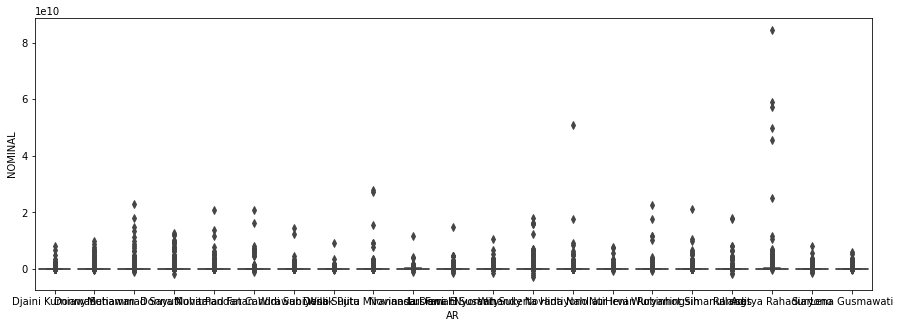

In [ ]:
plt.figure(figsize=(15,5))
sb.boxplot(x='AR' , y='NOMINAL', data=pilih);

<AxesSubplot:xlabel='DATEBAYAR', ylabel='NOMINAL'>

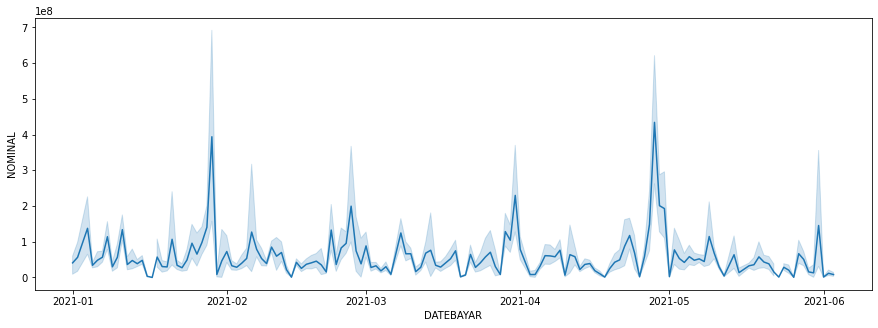

In [ ]:
plt.figure(figsize=(15,5))
sb.lineplot(x='DATEBAYAR', y='NOMINAL', data=pilih.loc[pilih.DATEBAYAR>'2020-12-31'])

In [ ]:
pilih.groupby('KODE_MAP')['NOMINAL'].sum().reset_index()

,KODE_MAP,NOMINAL
0,Bea Meterai,8.558160e+08
1,Fiskal Luar Negeri,1.598649e+11
2,PPN Dalam Negeri,2.015365e+12
3,PPN Impor,1.245974e+12
4,PPh 21,4.577993e+11
5,PPh 22,6.428617e+10
6,PPh 22 Impor,1.808316e+11
7,PPh 23,2.482066e+11
8,PPh 25 Badan,1.040275e+12
9,PPh 25 Orang Pribadi,3.028828e+08


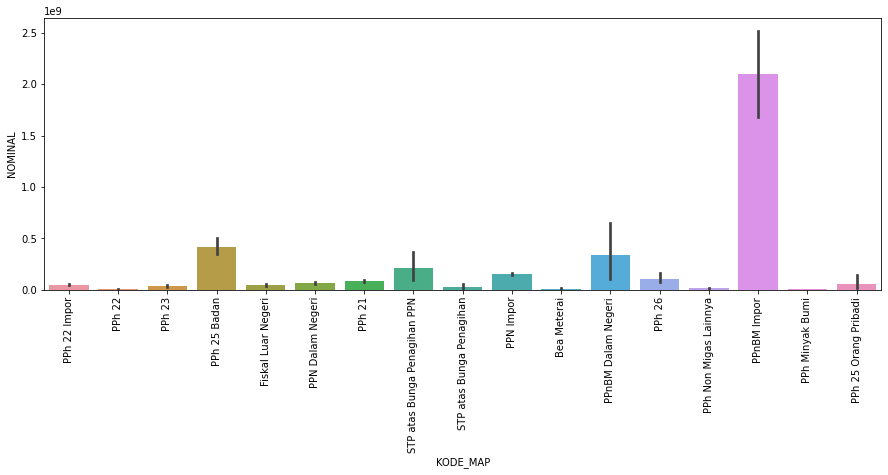

In [ ]:
plt.figure(figsize=(15,5))
sb.barplot(x='KODE_MAP',y='NOMINAL', data=pilih)
plt.xticks(rotation=90);